Sur le jeu de données suivant: 
    * extraire les données sur les dimensions des pétales
    * effectuer une CAH
    * utilisiser la méthode K-Means
    * Comparer les méthode
    * peut-on dire que la classification est bonne comparée au numéro de l'espèce donné?
    * effectuer une ACP
    * doit-on recommencer en excluant un groupe?

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [2]:
df = pd.read_excel('../data/Iris.xls')   # attention au chemin!!!!!
df.describe()

Species_No  Petal_width  Petal_length  Sepal_width  Sepal_length
count  150.000000   150.000000    150.000000   150.000000    150.000000
mean     2.000000     1.199333      3.758000     3.057333      5.843333
std      0.819232     0.762238      1.765298     0.435866      0.828066
min      1.000000     0.100000      1.000000     2.000000      4.300000
25%      1.000000     0.300000      1.600000     2.800000      5.100000
50%      2.000000     1.300000      4.350000     3.000000      5.800000
75%      3.000000     1.800000      5.100000     3.300000      6.400000
max      3.000000     2.500000      6.900000     4.400000      7.900000

In [3]:
# Sélection des variables quantitatives et conversion en forme verticale
x = df.iloc[:,1:5]
x.head(2)

Petal_width  Petal_length  Sepal_width  Sepal_length
0          0.2           1.4          3.5           5.1
1          0.2           1.4          3.0           4.9

In [4]:
# on centre et on réduit

import sklearn
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_cr = sc.fit_transform(x.values)

In [5]:
#dimension des données

print(x.shape)

#statistiques descriptives

print(x.describe())



(150, 4)
       Petal_width  Petal_length  Sepal_width  Sepal_length
count   150.000000    150.000000   150.000000    150.000000
mean      1.199333      3.758000     3.057333      5.843333
std       0.762238      1.765298     0.435866      0.828066
min       0.100000      1.000000     2.000000      4.300000
25%       0.300000      1.600000     2.800000      5.100000
50%       1.300000      4.350000     3.000000      5.800000
75%       1.800000      5.100000     3.300000      6.400000
max       2.500000      6.900000     4.400000      7.900000


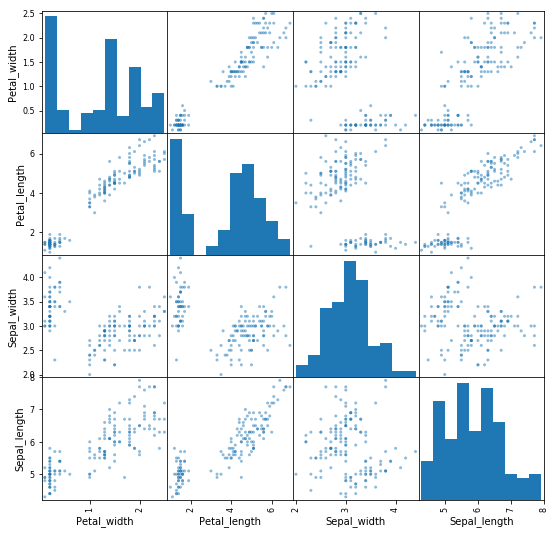

In [6]:
#graphique - croisement deux à deux des variables

scatt_mat = scatter_matrix(x,figsize=(9,9))[-1]

## CAH

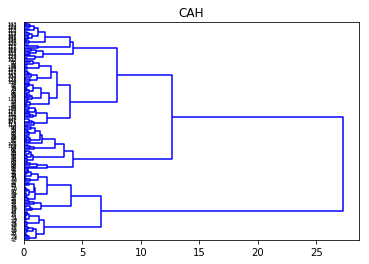

In [7]:
#librairies pour la CAH

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

#générer la matrice des liens

Z = linkage(x_cr,method='ward',metric='euclidean')

#affichage du dendrogramme

plt.title("CAH")
dendrogram(Z,labels=x.index,orientation='right',color_threshold=0)
plt.show()

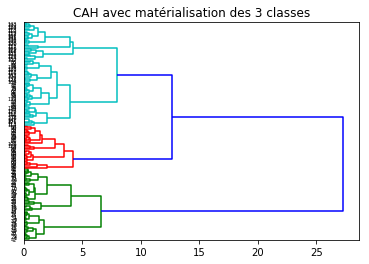

In [8]:
#matérialisation des 3 classes (hauteur t = 10)

plt.title('CAH avec matérialisation des 3 classes')
dendrogram(Z,labels=x.index,orientation='right',color_threshold=10)
plt.show()


In [9]:
#découpage à la hauteur t = 10 ==> identifiants de 3 groupes obtenus

groupes_cah = fcluster(Z,t=10,criterion='distance')
print(groupes_cah)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 2 1 1 1 1 1 1 1 1 3 3 3 2 3 2 3 2 3 2 2 3 2 3 2 3 2 2 2 2 3 3 3 3
 3 3 3 3 3 2 2 2 2 3 2 3 3 2 2 2 2 3 2 2 2 2 2 3 2 2 3 3 3 3 3 3 2 3 3 3 3
 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3]


In [10]:
#index triés des groupes

idg = np.argsort(groupes_cah)

#affichage des observations et leurs groupes

print(pd.DataFrame(x.index[idg],groupes_cah[idg]))

      0
1     0
1    27
1    28
1    29
1    30
1    31
1    32
1    33
1    34
1    35
1    36
1    37
1    38
1    39
1    40
1    42
1    43
1    45
1    46
1    47
1    48
1    49
1    26
1    25
1    44
1    23
1    24
1     1
1     2
1     3
..  ...
3    65
3    75
3    63
3    58
3    56
3    54
3    52
3    51
3    50
3    61
3    76
3    77
3    78
3   110
3   109
3   108
3   107
3   105
3   104
3   103
3   102
3   101
3   100
3    97
3    91
3    86
3    85
3    83
3   112
3   149

[150 rows x 1 columns]


## Kmeans

In [11]:
#k-means sur les données centrées et réduites

from sklearn import cluster
kmeans = cluster.KMeans(n_clusters=3)  # on choisit 3 avec l'étude du dessus
kmeans.fit(x_cr)

#index triés des groupes

print(kmeans.labels_)
idk = np.argsort(kmeans.labels_)

#affichage des observations et leurs groupes

print(pd.DataFrame(x.index[idk],kmeans.labels_[idk]))



[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 2 2 2 1 2 2 2 2 2 2 2 2 1 2 2 2 2 1 2 2 2
 2 1 1 1 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 1 1 1 1 1 1 2 2 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]
      0
0     0
0    27
0    28
0    29
0    30
0    31
0    32
0    33
0    34
0    35
0    36
0    26
0    38
0    40
0    41
0    42
0    43
0    44
0    45
0    46
0    47
0    48
0    49
0    39
0    25
0    37
0    23
0    24
0     1
0     2
..  ...
2    60
2    59
2    58
2    57
2    55
2    54
2    53
2    73
2   106
2    78
2    80
2    99
2    98
2    97
2    96
2    95
2    94
2    93
2    92
2    91
2    90
2    89
2    88
2    87
2    84
2    83
2    82
2    81
2    79
2   149

[150 rows x 1 columns]


In [12]:
#distances aux centres de classes des observations

dist_data = pd.DataFrame(kmeans.transform(x_cr),index = x.index)
print(dist_data)

            0         1         2
0    0.212958  3.989406  3.121198
1    0.996045  4.017933  2.675508
2    0.651984  4.193437  2.974167
3    0.903456  4.197847  2.880144
4    0.402155  4.111572  3.300226
5    1.211548  3.898931  3.505544
6    0.502449  4.216380  3.148564
7    0.091325  3.973134  2.991848
8    1.421747  4.407572  2.925159
9    0.789931  4.057643  2.793990
10   0.789994  3.920881  3.321253
11   0.276181  4.078536  3.049363
12   1.034979  4.164404  2.806350
13   1.334825  4.630697  3.212210
14   1.638656  4.146193  3.888350
15   2.398988  4.495475  4.499830
16   1.207488  4.029661  3.609780
17   0.216188  3.913885  3.055942
18   1.209867  3.725620  3.344940
19   0.867062  4.101019  3.500654
20   0.504016  3.663837  2.808257
21   0.668264  3.944967  3.278008
22   0.686581  4.510613  3.589909
23   0.479456  3.579964  2.559347
24   0.363454  3.988174  2.964932
25   0.990239  3.884319  2.556827
26   0.226831  3.790888  2.827972
27   0.294719  3.895399  3.059708
28   0.253611 

In [13]:
#correspondance avec les groupes de la CAH

pd.crosstab(groupes_cah,kmeans.labels_)

col_0   0   1   2
row_0            
1      49   0   0
2       1   0  29
3       0  47  24

[0.58175005 0.46304204 0.38517418 0.3423634  0.32310381 0.32876144
 0.33250604 0.33830936 0.35733617]


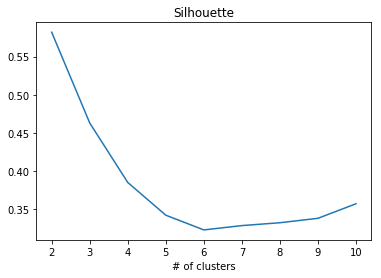

In [14]:
#librairie pour évaluation des partitions
from sklearn import metrics

#utilisation de la métrique "silhouette"
#faire varier le nombre de clusters de 2 à 10
res = np.arange(9,dtype="double")
for k in np.arange(9):
    km = cluster.KMeans(n_clusters=k+2)
    km.fit(x_cr)
    res[k] = metrics.silhouette_score(x_cr,km.labels_)
print(res)

#graphique
import matplotlib.pyplot as plt
plt.title("Silhouette")
plt.xlabel("# of clusters")
plt.plot(np.arange(2,11,1),res)
plt.show()

[251.34933946 241.9044017  206.68129207 203.26741933 187.14011029
 174.72818745 175.00085971 175.25152386 180.79763825]


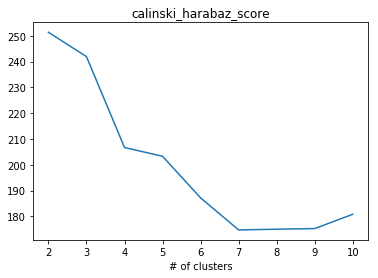

In [15]:
#utilisation de la métrique "calinski_harabaz_score"
#faire varier le nombre de clusters de 2 à 10
res = np.arange(9,dtype="double")
for k in np.arange(9):
    km = cluster.KMeans(n_clusters=k+2)
    km.fit(x_cr)
    res[k] = metrics.calinski_harabaz_score(x_cr,km.labels_)
print(res)

#graphique
import matplotlib.pyplot as plt
plt.title("calinski_harabaz_score")
plt.xlabel("# of clusters")
plt.plot(np.arange(2,11,1),res)
plt.show()

In [16]:
#moyenne par variable

m = x.mean()

#TSS

TSS = x.shape[0]*x.var(ddof=0)
print(TSS)

Petal_width      86.569933
Petal_length    464.325400
Sepal_width      28.306933
Sepal_length    102.168333
dtype: float64


In [17]:
#data.frame conditionnellement aux groupes

gb = x.groupby(kmeans.labels_)

#effectifs conditionnels

nk = gb.size()
print(nk)

0    50
1    47
2    53
dtype: int64


In [18]:
#moyennes conditionnelles

mk = gb.mean()
print(mk)

#pour chaque groupe écart à la moyenne par variable

EMk = (mk-m)**2

#pondéré par les effectifs du groupe

EM = EMk.multiply(nk,axis=0)


   Petal_width  Petal_length  Sepal_width  Sepal_length
0     0.246000      1.462000     3.428000      5.006000
1     1.972340      5.510638     3.095745      6.780851
2     1.413208      4.369811     2.673585      5.801887


In [19]:
#somme des valeurs => BSS

BSS = np.sum(EM,axis=0)
print(BSS)

Petal_width      75.950936
Petal_length    427.791221
Sepal_width      14.743966
Sepal_length     76.457556
dtype: float64


In [20]:
#carré du rapport de corrélation
#variance expliquée par l'appartenance aux groupes pour chaque variable

R2 = BSS/TSS
print(R2)

Petal_width     0.877336
Petal_length    0.921318
Sepal_width     0.520861
Sepal_length    0.748349
dtype: float64


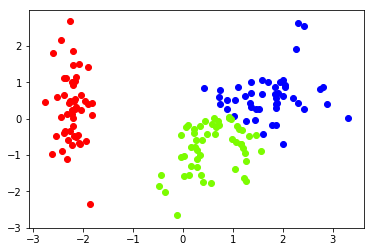

In [21]:
#ACP

from sklearn.decomposition import PCA
acp = PCA(n_components=2).fit_transform(x_cr)

#projeter dans le plan factoriel avec un code couleur différent selon le groupe

for couleur,k in zip(['red','blue','lawngreen','aqua'],[0,1,2,3]):
    plt.scatter(acp[kmeans.labels_==k,0],acp[kmeans.labels_==k,1],c=couleur)
plt.show()

In [22]:
#retirer des observations le groupe n°1 du k-means précédent
x_subset = x.iloc[kmeans.labels_!=0,:]

print(x_subset.shape)
print(x_subset)

(100, 4)
     Petal_width  Petal_length  Sepal_width  Sepal_length
50           1.4           4.7          3.2           7.0
51           1.5           4.5          3.2           6.4
52           1.5           4.9          3.1           6.9
53           1.3           4.0          2.3           5.5
54           1.5           4.6          2.8           6.5
55           1.3           4.5          2.8           5.7
56           1.6           4.7          3.3           6.3
57           1.0           3.3          2.4           4.9
58           1.3           4.6          2.9           6.6
59           1.4           3.9          2.7           5.2
60           1.0           3.5          2.0           5.0
61           1.5           4.2          3.0           5.9
62           1.0           4.0          2.2           6.0
63           1.4           4.7          2.9           6.1
64           1.3           3.6          2.9           5.6
65           1.4           4.4          3.1           6.7
66   

In [23]:
#centrer et réduire
x_subset_cr = sc.fit_transform(x_subset.values)
print(x_subset_cr)

[[-0.65303909 -0.25077906  0.99068792  1.11900931]
 [-0.41643072 -0.49425387  0.99068792  0.20924564]
 [-0.41643072 -0.00730424  0.68864892  0.96738203]
 [-0.88964745 -1.10294091 -1.72766308 -1.15539985]
 [-0.41643072 -0.37251647 -0.21746808  0.36087292]
 [-0.88964745 -0.49425387 -0.21746808 -0.8521453 ]
 [-0.17982236 -0.25077906  1.29272692  0.05761837]
 [-1.59947255 -1.95510276 -1.42562408 -2.06516352]
 [-0.88964745 -0.37251647  0.08457092  0.5125002 ]
 [-0.65303909 -1.22467832 -0.51950708 -1.61028169]
 [-1.59947255 -1.71162795 -2.63378009 -1.91353624]
 [-0.41643072 -0.8594661   0.38660992 -0.54889074]
 [-1.59947255 -1.10294091 -2.02970209 -0.39726347]
 [-0.65303909 -0.25077906  0.08457092 -0.24563619]
 [-0.88964745 -1.58989054  0.08457092 -1.00377258]
 [-0.65303909 -0.61599128  0.68864892  0.66412748]
 [-0.41643072 -0.49425387  0.38660992 -1.00377258]
 [-1.59947255 -0.9812035  -0.51950708 -0.70051802]
 [-0.41643072 -0.49425387 -2.02970209 -0.09400891]
 [-1.36286418 -1.22467832 -1.12

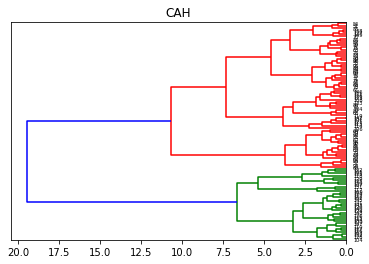

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 2 1 1 2 1 2 2 1 1 1 1 2 1 2 1 2
 1 1 2 2 1 1 1 1 1 2 2 1 1 1 2 1 1 1 2 1 1 1 2 1 1 2]


In [24]:
#générer la matrice des liens

Z_subset = linkage(x_subset_cr,method='ward',metric='euclidean')

#cah et affichage du dendrogramme

plt.title("CAH")
dendrogram(Z_subset,labels=x_subset.index,orientation='left',color_threshold=11)
plt.show()

#groupes

groupes_subset_cah = fcluster(Z_subset,t=11,criterion='distance')
print(groupes_subset_cah)

In [25]:
#index triés des groupes

idg = np.argsort(groupes_subset_cah)

#affichage des observations et leurs groupes

print(pd.DataFrame(x.index[idg],groupes_subset_cah[idg]))

     0
1   74
1   75
1   50
1   72
1   70
1   68
1   67
1   66
1   78
1   65
1   60
1   59
1   57
1   55
1   54
1   53
1   52
1   62
1   79
1   98
1   81
1   80
1   89
1   87
1   86
1   93
1   90
1   85
1   94
1   95
..  ..
2    3
2    2
2    1
2   22
2   48
2   23
2   25
2   46
2   45
2   44
2   43
2   42
2   41
2   40
2   39
2   38
2   37
2   36
2   35
2   34
2   33
2   32
2   31
2   30
2   29
2   28
2   27
2   26
2   24
2   99

[100 rows x 1 columns]


In [26]:
#k-means sur les données centrées et réduites

from sklearn import cluster
kmeans = cluster.KMeans(n_clusters=2)  # on choisit 2 avec l'étude du dessus
kmeans.fit(x_subset_cr)

#index triés des groupes

print(kmeans.labels_)
idk = np.argsort(kmeans.labels_)

#affichage des observations et leurs groupes

print(pd.DataFrame(x.index[idk],kmeans.labels_[idk]))


[1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 0
 1 1 0 0 1 1 1 1 1 0 0 1 1 1 0 1 1 1 0 1 1 1 0 1 1 0]
     0
0   49
0   34
0   35
0   36
0   37
0   38
0   39
0   40
0   41
0   42
0   43
0   44
0   45
0   46
0   33
0   47
0   51
0   56
0   63
0   69
0   71
0   73
0   76
0   77
0   83
0   84
0   88
0   92
0   96
0   48
..  ..
1   90
1   91
1   93
1   94
1   95
1   86
1    2
1   65
1   74
1   27
1   98
1   50
1   52
1   53
1   54
1   55
1   57
1   58
1   59
1   60
1   61
1   62
1   64
1   66
1   67
1   68
1   70
1   72
1   75
1    0

[100 rows x 1 columns]


In [27]:
#correspondance avec les groupes de la CAH

pd.crosstab(groupes_subset_cah,kmeans.labels_)

col_0   0   1
row_0        
1       0  33
2      61   6

In [28]:
#data.frame conditionnellement aux groupes

gb = x_subset.groupby(kmeans.labels_)

#effectifs conditionnels

nk = gb.size()
print(nk)

0    61
1    39
dtype: int64


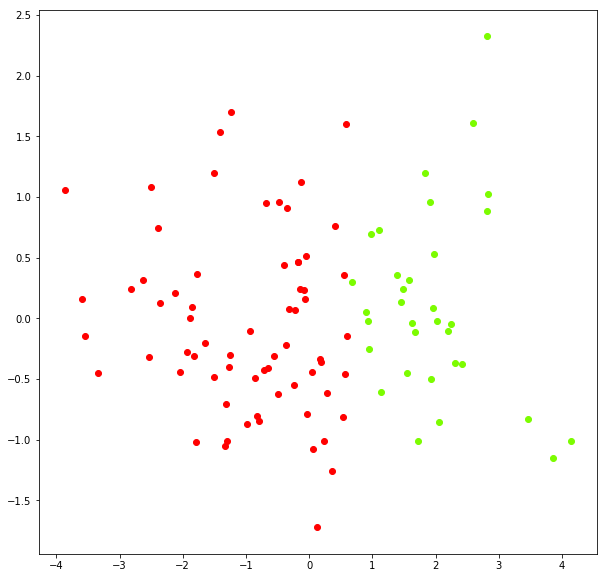

In [29]:
#ACP
acp_subset = PCA(n_components=2).fit_transform(x_subset_cr)
#projeter dans le plan factoriel
#avec un code couleur selon le groupe
#remarquer le rôle de zip()
plt.figure(figsize=(10,10))
for couleur,k in zip(['lawngreen','red','aqua'],[1,2,3]):
    plt.scatter(acp_subset[groupes_subset_cah==k,0],acp_subset[groupes_subset_cah==k,1],c=couleur)
#mettre les labels des points
#remarquer le rôle de enumerate()
#for i,label in enumerate(x_subset.index):
    #plt.annotate(label,(acp_subset[i,0],acp_subset[i,1]))
plt.show()